In [33]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
import torch.nn as nn

In [76]:
x = torch.randn(1000, 1)*20
y = 3*x + torch.randn(1000, 1)*10
#optional reading the data off of the disk
data = pd.read_csv("ep2_data.csv")
data['X']

0     8.822693
1     9.150040
2     3.828638
3     9.593057
4     3.904482
        ...   
95    2.330659
96    9.578310
97    3.312838
98    3.227418
99    0.162027
Name: X, Length: 100, dtype: float64

In [88]:
class CustomDataset(torch.utils.data.Dataset):
    # def __init__(self, x, y):
    #     super().__init__()
    #     self.x = x
    #     self.y = y
    
    def __init__(self, data):
        super().__init__()
        self.x = torch.tensor(data['X'], dtype=torch.float32).view(-1, 1)
        self.y = torch.tensor(data['y'], dtype=torch.float32).view(-1, 1)
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(1, 1)
        print(self.layer.weight.dtype)
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [89]:
input_data = CustomDataset(data)
train_loader = torch.utils.data.DataLoader(input_data, batch_size=100, shuffle=True)
print(next(iter(train_loader)))

[tensor([[4.2940],
        [5.9358],
        [5.8946],
        [8.6940],
        [7.1043],
        [9.1470],
        [2.5657],
        [5.5466],
        [3.2274],
        [2.4768],
        [8.3990],
        [3.8135],
        [8.8544],
        [6.2745],
        [8.3169],
        [6.5321],
        [9.1027],
        [3.4231],
        [2.6949],
        [8.8227],
        [9.5931],
        [9.4077],
        [5.8321],
        [2.6658],
        [2.0178],
        [2.9692],
        [2.0180],
        [6.0570],
        [1.1152],
        [1.5914],
        [8.9130],
        [8.8601],
        [3.7252],
        [6.5418],
        [5.3148],
        [6.4402],
        [2.6963],
        [2.4179],
        [5.6772],
        [3.8286],
        [6.5244],
        [7.9364],
        [6.0090],
        [9.8113],
        [2.8141],
        [3.0682],
        [1.4474],
        [8.0898],
        [1.9936],
        [7.0711],
        [3.9045],
        [7.4109],
        [7.8863],
        [9.5783],
        [9.3460],
        [

In [90]:
model = LinearRegression()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
mse = torch.nn.MSELoss()

torch.float32


Epoch: 0, Loss: 95.43618774414062
Epoch: 1, Loss: 94.38270568847656
Epoch: 2, Loss: 93.33856201171875
Epoch: 3, Loss: 92.30370330810547
Epoch: 4, Loss: 91.27808380126953
Epoch: 5, Loss: 90.26164245605469
Epoch: 6, Loss: 89.25431823730469
Epoch: 7, Loss: 88.25606536865234
Epoch: 8, Loss: 87.26681518554688
Epoch: 9, Loss: 86.28654479980469
Epoch: 10, Loss: 85.31515502929688
Epoch: 11, Loss: 84.3526382446289
Epoch: 12, Loss: 83.39892578125
Epoch: 13, Loss: 82.45393371582031
Epoch: 14, Loss: 81.51763916015625
Epoch: 15, Loss: 80.58997344970703
Epoch: 16, Loss: 79.6708984375
Epoch: 17, Loss: 78.76034545898438
Epoch: 18, Loss: 77.85826873779297
Epoch: 19, Loss: 76.96460723876953
Epoch: 20, Loss: 76.07931518554688
Epoch: 21, Loss: 75.20233154296875
Epoch: 22, Loss: 74.33361053466797
Epoch: 23, Loss: 73.47309875488281
Epoch: 24, Loss: 72.62071990966797
Epoch: 25, Loss: 71.7764663696289
Epoch: 26, Loss: 70.94024658203125
Epoch: 27, Loss: 70.1120376586914
Epoch: 28, Loss: 69.291748046875
Epoch: 

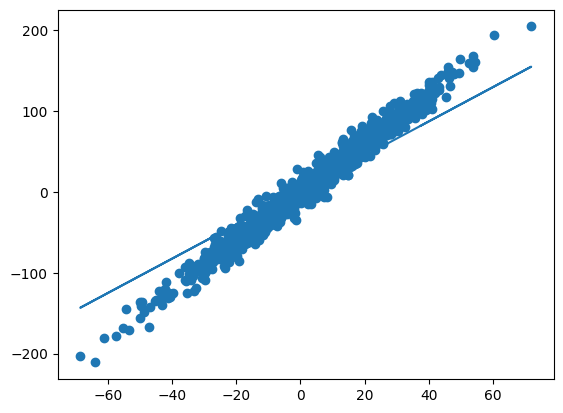

In [92]:
epochs = 1000
for epoch in range(epochs):
    for x_train, y_train in train_loader:
        optimizer.zero_grad()
        pred = model(x_train) 
        loss = mse(pred, y_train)
        loss.backward()
        optimizer.step()
    print(f"Epoch: {epoch}, Loss: {loss}")
with torch.no_grad():
    y_pred = model(x)
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred)